# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import math

Insurance_cost = pd.read_csv("F://Luis//Codecademy//python-portfolio-project-starter-files//insurance.csv")
print(Insurance_cost.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
column_names = list(Insurance_cost.columns.values)
print(column_names)
patient_count = len(Insurance_cost)
print("There are " + str(patient_count) + " patients in the list.")

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
There are 1338 patients in the list.


In [3]:

age_male= Insurance_cost.age[Insurance_cost.sex == "male"]
age_mean_male = age_male.mean()
age_female= Insurance_cost.age[Insurance_cost.sex == "female"]
age_mean_female = age_female.mean()
charge_mean_female = Insurance_cost.charges[Insurance_cost.sex == "female"].mean()
charge_mean_male = Insurance_cost.charges[Insurance_cost.sex == "male"].mean()

print("Average age in males: ", int(age_mean_male))
print("average cost in males is: ${:.2f}".format(charge_mean_male))
print("average age in females: ", int(age_mean_female))
print("average cost in females is: ${:.2f}".format(charge_mean_female))

Average age in males:  38
average cost in males is: $13956.75
average age in females:  39
average cost in females is: $12569.58


In [4]:
total_smokers= Insurance_cost.smoker[Insurance_cost.smoker == "yes"].count()
print("Total smokers: ", total_smokers)
mean_smokers=total_smokers/Insurance_cost["smoker"].count()
print("average number of smokers: ", (mean_smokers*100),"%")
male_smokers= Insurance_cost.sex[(Insurance_cost.sex == "male") & (Insurance_cost.smoker == "yes")].count()
P_male_smokers = male_smokers/total_smokers
female_smokers= Insurance_cost.sex[(Insurance_cost.sex == "female") & (Insurance_cost.smoker == "yes")].count()
P_female_smokers = female_smokers/total_smokers
print("Of the total number of smokers, the percentage of meles is {:.2f}% and the females is {:.2f}%".format((P_male_smokers*100),(P_female_smokers*100)) )
print("You can see in the table below that smoking increases the cost of insurance") 
smokers_charges_mean = Insurance_cost.charges[Insurance_cost.smoker == "yes"].mean()
no_smokers_mean= Insurance_cost.charges[Insurance_cost.smoker == "no"].mean()
print("The average charge among smokers is: $", int(smokers_charges_mean), "and the non smokers is: $",int(no_smokers_mean)) 

Total smokers:  274
average number of smokers:  20.47832585949178 %
Of the total number of smokers, the percentage of meles is 58.03% and the females is 41.97%
You can see in the table below that smoking increases the cost of insurance
The average charge among smokers is: $ 32050 and the non smokers is: $ 8434


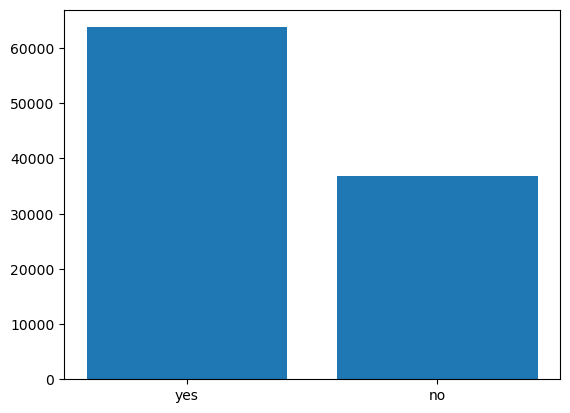

<Figure size 640x480 with 0 Axes>

In [5]:
plt.bar(Insurance_cost.smoker,Insurance_cost.charges)
plt.show()
plt.clf()

In [6]:
mean_bmi=Insurance_cost["bmi"].mean()
male_bmi_mean= Insurance_cost.bmi[Insurance_cost.sex == "male"].mean()
female_bmi_mean= Insurance_cost.bmi[Insurance_cost.sex == "female"].mean()
print("the average overall BMI is: {:.2f}, the male is {:.2f} and female is {:.2f}".format(mean_bmi,male_bmi_mean,female_bmi_mean))
print("It is noted that there is almost no difference between men and women")

the average overall BMI is: 30.66, the male is 30.94 and female is 30.38
It is noted that there is almost no difference between men and women


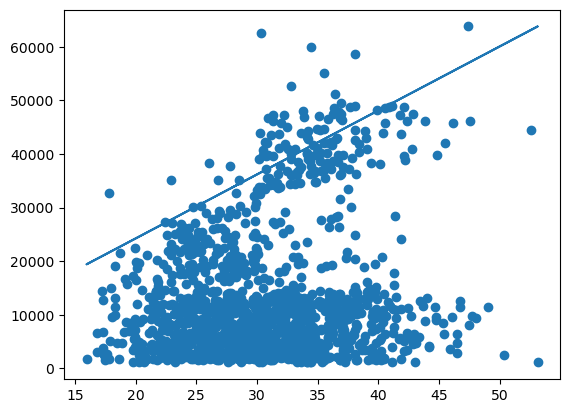

<Figure size 640x480 with 0 Axes>

In [7]:
model = sm.OLS.from_formula('charges ~ bmi', data = Insurance_cost)
results = model.fit()
predicted = 1192.93 *Insurance_cost.bmi + 393.87
#print(results.params)
#fitted_values = results.predict(Insurance_cost)
#residuals = Insurance_cost.charges - fitted_values
#plt.hist(residuals)
#plt.show()
#plt.clf()
#plt.scatter(fitted_values, residuals)
#plt.show()
#plt.clf()
plt.scatter(Insurance_cost.bmi,Insurance_cost.charges)
plt.plot(Insurance_cost.bmi,predicted)
plt.show()
plt.clf()

In [8]:
print("Despite the possible relationship between the BMI and the charges, there is no normality that proves to us that there is an irrefutable relationship")

Despite the possible relationship between the BMI and the charges, there is no normality that proves to us that there is an irrefutable relationship


In [9]:
regions= list(set(Insurance_cost["region"]))
regions_mean= {}
for r in regions:
        mean= Insurance_cost.charges[Insurance_cost.region == r].mean()
        regions_mean[r]=mean
        print("The charge on region ",r, "is: $",int(mean))


The charge on region  southeast is: $ 14735
The charge on region  southwest is: $ 12346
The charge on region  northwest is: $ 12417
The charge on region  northeast is: $ 13406


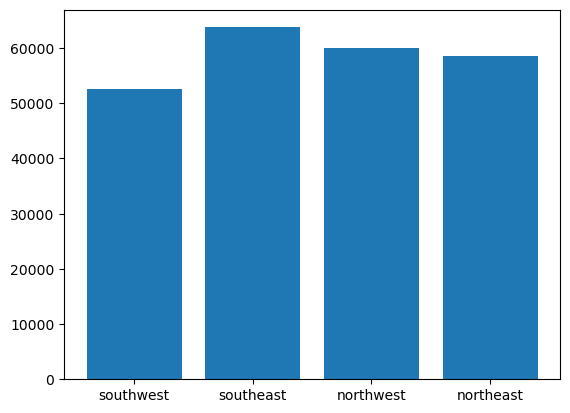

<Figure size 640x480 with 0 Axes>

In [10]:
plt.bar(Insurance_cost.region,Insurance_cost.charges)
plt.show()
plt.clf()

In [11]:
print("We can notice that if there is an increase in the charge depending on the region")

We can notice that if there is an increase in the charge depending on the region
